In [4]:
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683
"""

'\nLog-likelihood for Gaussian Distribution\n----------------------------------------\nFigure5.4\nAn illustration of the logarithm of the posterior probability density\nfunction for :math:`\\mu` and :math:`\\sigma`, :math:`L_p(\\mu,\\sigma)`\n(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,\nand V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as\nshown in the legend. The maximum value of :math:`L_p` is at :math:`\\mu_0 = 1.0`\nand :math:`\\sigma_0 = 1.8`. The contours enclose the regions that contain\n0.683\n'

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [7]:
def gauss_logL(xbar, V, n, sigma, mu):
    """
    Equation 5.57: gaussian likelihood
    """
    return (-(n + 1) * np.log(sigma) - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

In [8]:
#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()


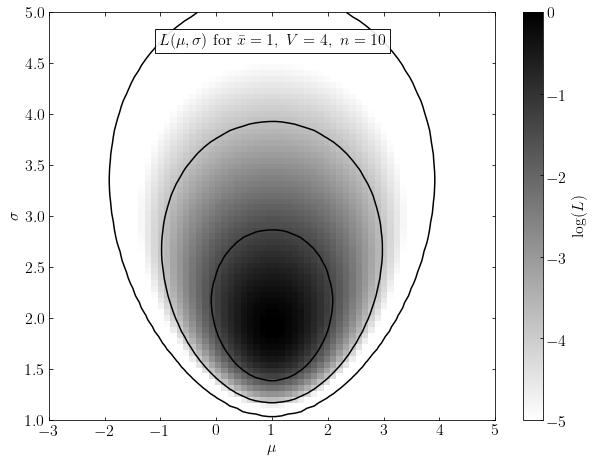

In [10]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))

plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')

plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),levels=(0.683, 0.955, 0.997),colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()
